HOW MUCH RED PAINT DOES IT TAKE TO BE FUNNIER THAN SOUND?

In [2]:
# IMPORTS/CONSTANTS FOR EXPERIMENT

from main import *  # Must be reimported when changes made to module file

filename = "ALZHEIMERS_HPLC.xlsx"  # TCB2 #using current working directory plus file name

saveMetadata(
    filename,
    {  # TO DO : change name to treatment_info and add columns in df REMI
        1: {
            "treatment": "young_WT",
            "color": "white",
            "experiments": ["Alzheimers"],
        },
        2: {
            "treatment": "young_AD",
            "color": "bisque",
            "experiments": ["Alzheimers"],
        },
        3: {
            "treatment": "old_WT",
            "color": "red",
            "experiments": ["Alzheimers"],
        },
        4: {
            "treatment": "old_AD",
            "color": "firebrick",
            "experiments": ["Alzheimers"],
        },
    },
    {
        "Alzheimers": {
            "groups": [1, 2, 3, 4],
            "independant_vars": ["age", "genetic_background"],
            "paired": False,
            "parametric": True,  # idealy this would be True / False / Check : check would involve checking the data using the spearman test which should already be done then taking the majority of the data to be parametric or not chose that
            "outliers": "grubbs",
        },
    },
)

correlogram(filename, 
            experiment='Alzheimers', #  dose_response Alzheimers
            correlogram_type='compound',
            to_correlate='NA-DA', 
            p_value_threshold=0.05, 
            n_minimum=5, 
            columns=["OF","PL","CC", "M", "SJ","SL1", "SR1", "AC", "V",  
                     "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", 
                     "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"],
            from_scratch=True,
            
            )




network(filename, 
            experiment='Alzheimers', #  dose_response Alzheimers
            correlogram_type='compound',
            to_correlate='NA-DA', 
            p_value_threshold=0.05, 
            n_minimum=5, 
            columns=["OF","PL","CC", "M", "SJ","SL1", "SR1", "AC", "V",  
                     "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", 
                     "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"],
            from_scratch=True,
            
            )


TREATMENT MAPPING {1: {'treatment': 'young_WT', 'color': 'white', 'experiments': ['Alzheimers']}, 2: {'treatment': 'young_AD', 'color': 'bisque', 'experiments': ['Alzheimers']}, 3: {'treatment': 'old_WT', 'color': 'red', 'experiments': ['Alzheimers']}, 4: {'treatment': 'old_AD', 'color': 'firebrick', 'experiments': ['Alzheimers']}} SAVED TO /home/remi/phd/input/cache/ALZHEIMERS_HPLC SUBCACHE
EXPERIMENTAL INFO {'Alzheimers': {'groups': [1, 2, 3, 4], 'independant_vars': ['age', 'genetic_background'], 'paired': False, 'parametric': True, 'outliers': 'grubbs'}} SAVED TO /home/remi/phd/input/cache/ALZHEIMERS_HPLC SUBCACHE
Invalid characters in identifier, replacing with '_' 
BUILDING "compound_and_ratios_df"
BUILDING "compound_df"
BUILDING "raw_df"


In [2]:
#CONSTRUCTION


#5HIAA/5HT no working with all BRs
#any single val issue IndexError: list index out of range
#all BRs ValueError: Shape of passed values is (39, 39), indices imply (39, 60)

justStats(filename, 
          experiments=['dose_response'], 
          compounds=['5HIAA/5HT'], 
          regions=["OF","PL","CC", "IC","M", "SJ","SL1", "SL6", "SR6", "SR1", "AC", "V",  
                "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", 
                "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"], 
        p_value_threshold=0.05)

#issues
#duplicating rows not updating them
#saving tukey when only need higher stats

subselectDf(getQuantitativeStats(filename), {'experiment':'dose_response', 
                                            #  'is_significant':True, 
                                             'compound':'5HIAA/5HT', 
                                             'test':'one_way_anova',
                                             'region':["OF","PL","CC", "IC","M", "SJ","SL1", "SL6", "SR6", "SR1", "AC", "V",  
                "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", 
                "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"]})


RETRIEVED "compound_and_ratios_df" FROM "TCB2_data_HPLC" CACHE
Calculating stats for dose_response, 5HIAA/5HT, OF
Index(['mouse_id', 'group_id', 'value', 'compound', 'region', 'treatment',
       'color', 'experiment', 'grubbs_outlier', 'eliminated_grubbs_outlier'],
      dtype='object')

ONE_WAY_ANOVA SIGNIFICANT
           F       p_value
0  37.538512  2.577968e-11

TUKEY SIGNIFICANT
        group1      group2  meandiff   p-adj   lower   upper  reject
0  0.3mg/kgTCB  10mg/kgTCB   -0.5226  0.0000 -0.7014 -0.3438    True
1  0.3mg/kgTCB   3mg/kgTCB   -0.3628  0.0000 -0.5416 -0.1840    True
2  0.3mg/kgTCB    vehicles    0.0623  0.7958 -0.1205  0.2451   False
3   10mg/kgTCB   3mg/kgTCB    0.1598  0.0711 -0.0099  0.3294   False
4   10mg/kgTCB    vehicles    0.5849  0.0000  0.4111  0.7588    True
5    3mg/kgTCB    vehicles    0.4251  0.0000  0.2513  0.5990    True
RETRIEVED "quantitative_stats" FROM "TCB2_data_HPLC" CACHE
CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/qu

,data_type,experiment,region,compound,test,p_value_threshold,is_significant,p_value,result
0,HPLC,dose_response,OF,5HIAA/5HT,one_way_anova,0.05,True,0.0,F p_value 0 37.538512 2.577...
0,HPLC,dose_response,PL,5HIAA/5HT,one_way_anova,0.05,True,0.0,F p_value 0 30.354565 2.706...
0,HPLC,dose_response,CC,5HIAA/5HT,one_way_anova,0.05,True,0.0,F p_value 0 33.127502 8.176...
0,HPLC,dose_response,IC,5HIAA/5HT,one_way_anova,0.05,True,0.0,F p_value 0 19.081323 8.910...
0,HPLC,dose_response,M,5HIAA/5HT,one_way_anova,0.05,True,0.0,F p_value 0 16.900008 4.465...
0,HPLC,dose_response,SJ,5HIAA/5HT,one_way_anova,0.05,True,0.003399,F p_value 0 5.376438 0.003399
0,HPLC,dose_response,SL1,5HIAA/5HT,one_way_anova,0.05,True,0.0,F p_value 0 16.793031 3.679...
0,HPLC,dose_response,SL6,5HIAA/5HT,one_way_anova,0.05,True,0.0,F p_value 0 30.538602 2.494...
0,HPLC,dose_response,SR6,5HIAA/5HT,one_way_anova,0.05,True,0.0,F p_value 0 18.362372 1.376...
0,HPLC,dose_response,SR1,5HIAA/5HT,one_way_anova,0.05,True,0.0,F p_value 0 16.826781 3.600...


Invalid characters in identifier, replacing with '_' 
RETRIEVED "quantitative_stats" FROM "TCB2_data_HPLC" CACHE
please make code for PLOTTING SIGNIFICANCE as in hist func
CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/quantitative_summary_dose_response_for_5HIAA_5HT_in_[_OF__ _PL__ _CC__ _M__ _SJ__ _SL1__ _SR1__ _AC__ _V__ _Am__ _dH__ _vH__ _NAc__ _VM__ _DM__ _VL__ _DL__ _MD__ _VPL__ _VPR__ _DG__ _Y__ _SC__ _SN__ _VTA__ _DR__ _MR__ _CE_].pkl
SAVED /Users/jasminebutler/Desktop/phd/output/quantitative_summary/quantitative_summary_dose_response_for_5HIAA_5HT_in_[_OF__ _PL__ _CC__ _M__ _SJ__ _SL1__ _SR1__ _AC__ _V__ _Am__ _dH__ _vH__ _NAc__ _VM__ _DM__ _VL__ _DL__ _MD__ _VPL__ _VPR__ _DG__ _Y__ _SC__ _SN__ _VTA__ _DR__ _MR__ _CE_].svg
SAVED /Users/jasminebutler/Desktop/phd/output/quantitative_summary/quantitative_summary_dose_response_for_5HIAA_5HT_in_[_OF__ _PL__ _CC__ _M__ _SJ__ _SL1__ _SR1__ _AC__ _V__ _Am__ _dH__ _vH__ _NAc__ _VM__ _DM__ _VL__ _DL__ _MD__ _VPL__ _V

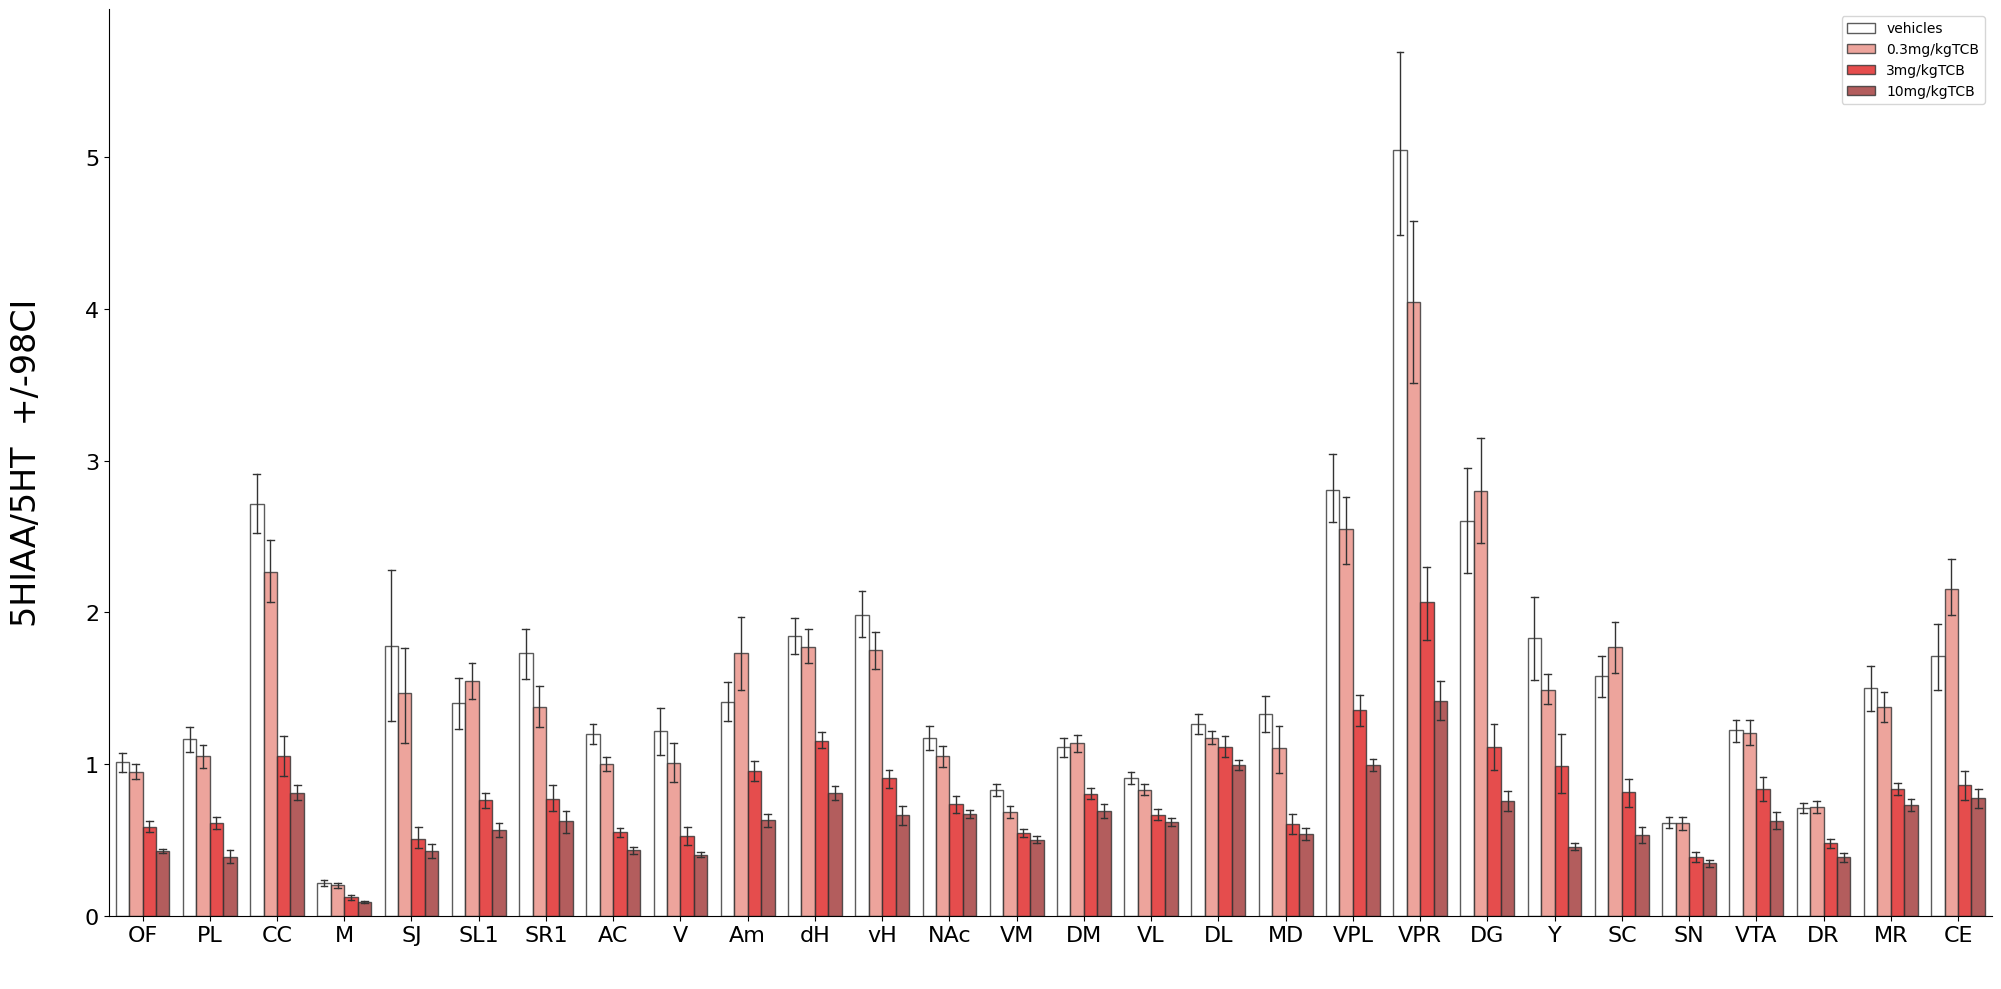

In [3]:
# quantitativeSummary(
#         filename,
#         experiment='dose_response',
#         histogram_type='compound', #chose a single compound or region
#         to_plot=['DA'], #chose a list of regions or compounds (x-axis of hist)
#         p_value_threshold=0.05,
#         columns=['DM','VM','DL','VL'],
#         from_scratch=True )

# OF,PL,CC,M,SJ,SL1,SR1,AC,V,Am,dH,vH,NAc,VM,DM,VL,DL,MD,VPL,VPR,DG,Y,SC,SN,VTA,DR,MR,CE

quantitativeSummary(
    filename,
    experiment='dose_response',
    histogram_type='compound',  #  compound or region
    to_plot='5HIAA/5HT',  # chosen compound or region 
    p_value_threshold=0.05,
    columns=["OF","PL","CC", "M", "SJ","SL1",  "SR1", "AC", "V",  
                "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", 
                "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"], # x values to plot 
    from_scratch=True,
)

# quantitativeSummary(
#      filename,
#     experiment='agonist_antagonist',
#     histogram_type='compound',  #  compound or region
#     to_plot='3MT/DA',  # chosen compound or region 
#     p_value_threshold=0.05,
#     columns=[ "NAc", "VM", "DM","VL", "DL"], # x values to plot 
#     from_scratch=True,
# )
#JJB fix need to run juststats for the regions before otherwise cvant fetch stats df


In [ ]:
#PERCENTAGE VEHICLES FIG
percentageVehiclesFig(
        filename,
        experiment='dose_response',
        compound='DA',
        regions=["OF","PL","CC", "IC","M", "SJ","SL1", "SL6", "SR6", "SR1", "AC", "V",  
                "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", 
                "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"], #REMI i would ike this to work the same way it does for correlograms i.e. also specifying the order 
        from_scratch=True )

#plots but : UserWarning: FixedFormatter should only be used together with FixedLocator

Invalid characters in identifier, replacing with '_' 
PROCESSING 5HIAA/5HT IN OF FOR dose_response

ONE_WAY_ANOVA SIGNIFICANT
           F       p_value
0  37.538512  2.577968e-11

TUKEY SIGNIFICANT
        group1      group2  meandiff   p-adj   lower   upper  reject
0  0.3mg/kgTCB  10mg/kgTCB   -0.5226  0.0000 -0.7014 -0.3438    True
1  0.3mg/kgTCB   3mg/kgTCB   -0.3628  0.0000 -0.5416 -0.1840    True
2  0.3mg/kgTCB    vehicles    0.0623  0.7958 -0.1205  0.2451   False
3   10mg/kgTCB   3mg/kgTCB    0.1598  0.0711 -0.0099  0.3294   False
4   10mg/kgTCB    vehicles    0.5849  0.0000  0.4111  0.7588    True
5    3mg/kgTCB    vehicles    0.4251  0.0000  0.2513  0.5990    True
RETRIEVED "quantitative_stats" FROM "TCB2_data_HPLC" CACHE
CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/quantitative_stats.pkl
QUANTITATIVE STATS UPDATED
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 

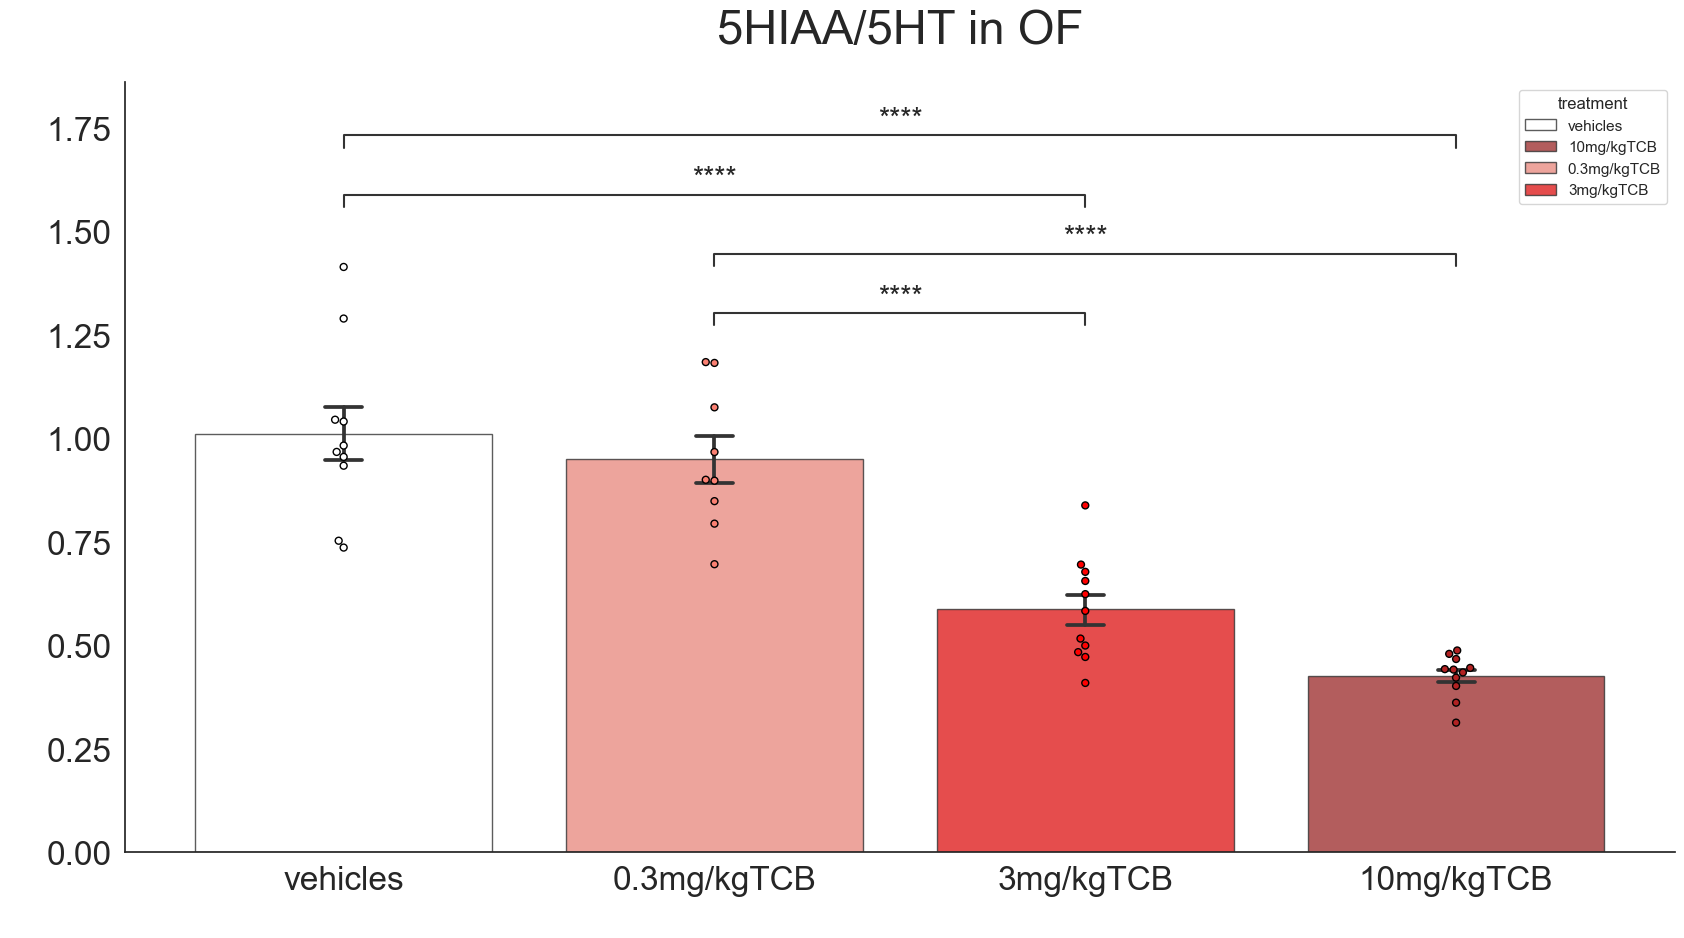

CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/dose_response_for_5HIAA_5HT_in_OF.pkl
SAVED /Users/jasminebutler/Desktop/phd/output/histogram/dose_response_for_5HIAA_5HT_in_OF.svg
SAVED /Users/jasminebutler/Desktop/phd/output/histogram/dose_response_for_5HIAA_5HT_in_OF.png


In [5]:
#QUANTITATIVE HISTOGRAMS

quantitativeHistogram( 
    filename,
    p_value_threshold=0.05,
    compound='5HIAA/5HT',
    region='OF',
    experiment= 'dose_response', 
    do_outliers=False, 
    from_scratch=True
)


# subselectDf(getCompoundAndRatiosDf(filename), {'compound':'5HIAA/5HT', 'region':'OF', 'experiment':'agonist_antagonist'})


Invalid characters in identifier, replacing with '_' 


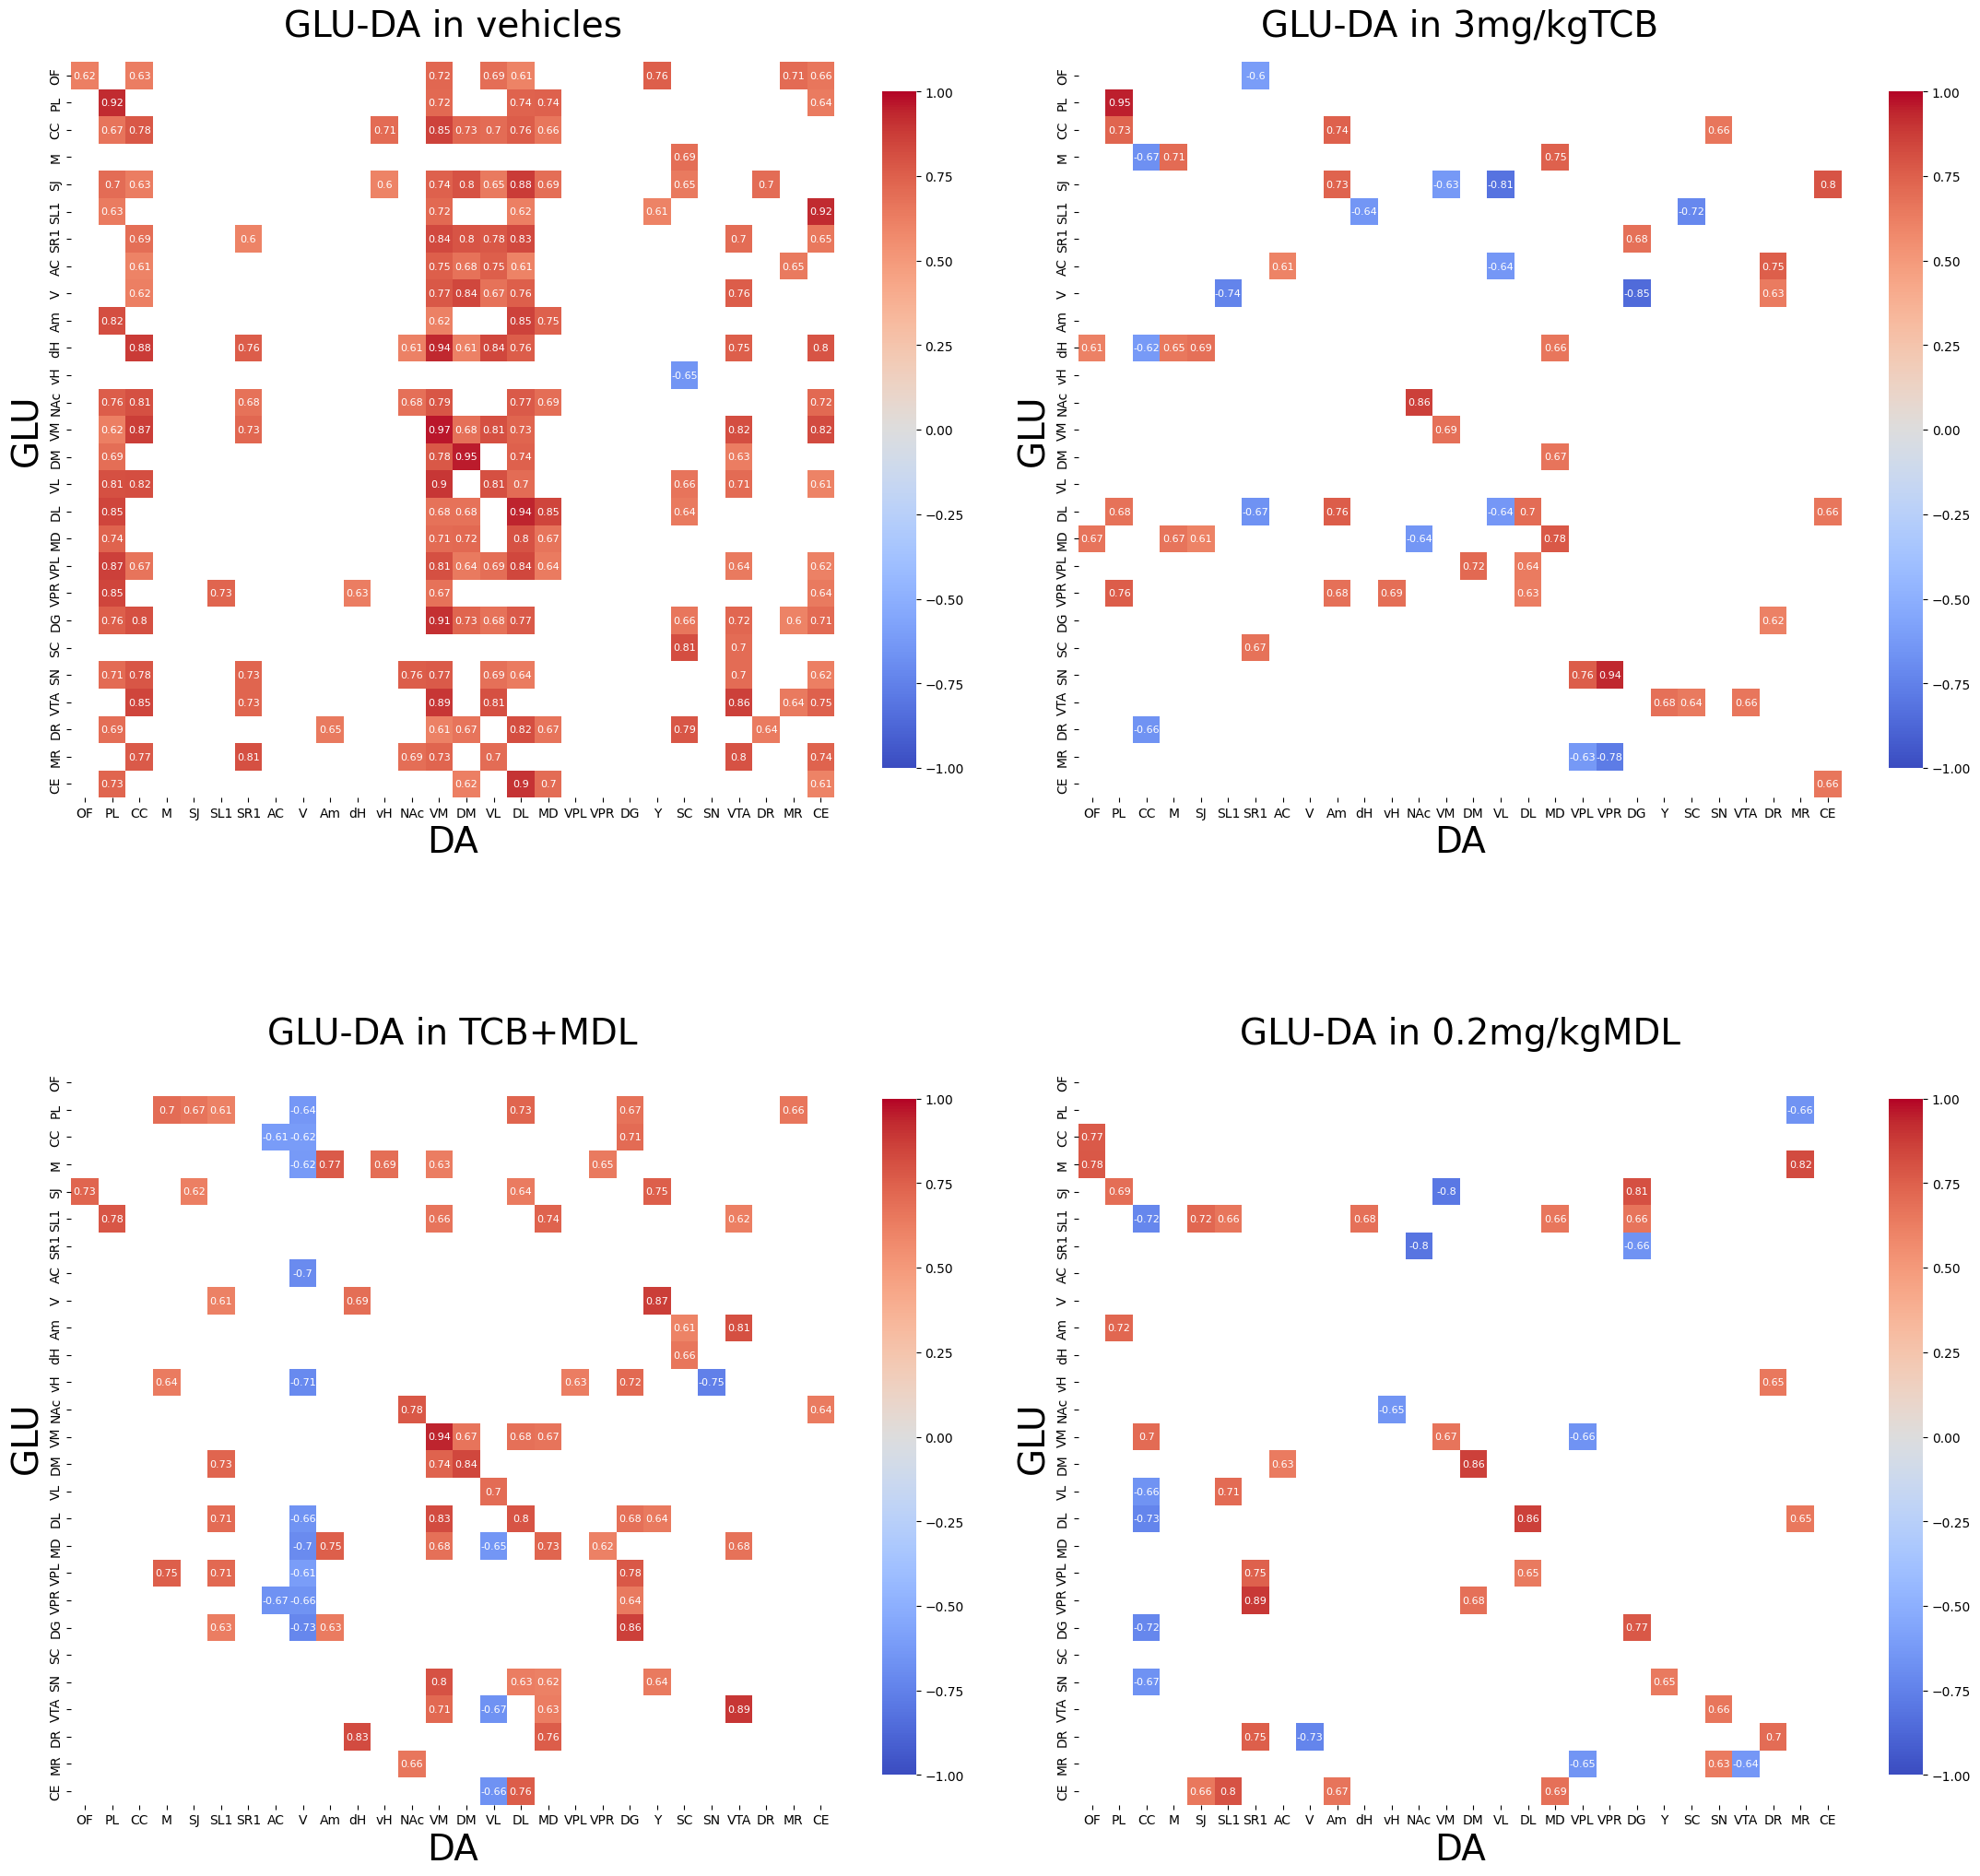

Invalid characters in identifier, replacing with '_' 


/Users/jasminebutler/Desktop/phd/module/graph_theory.py:115: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(


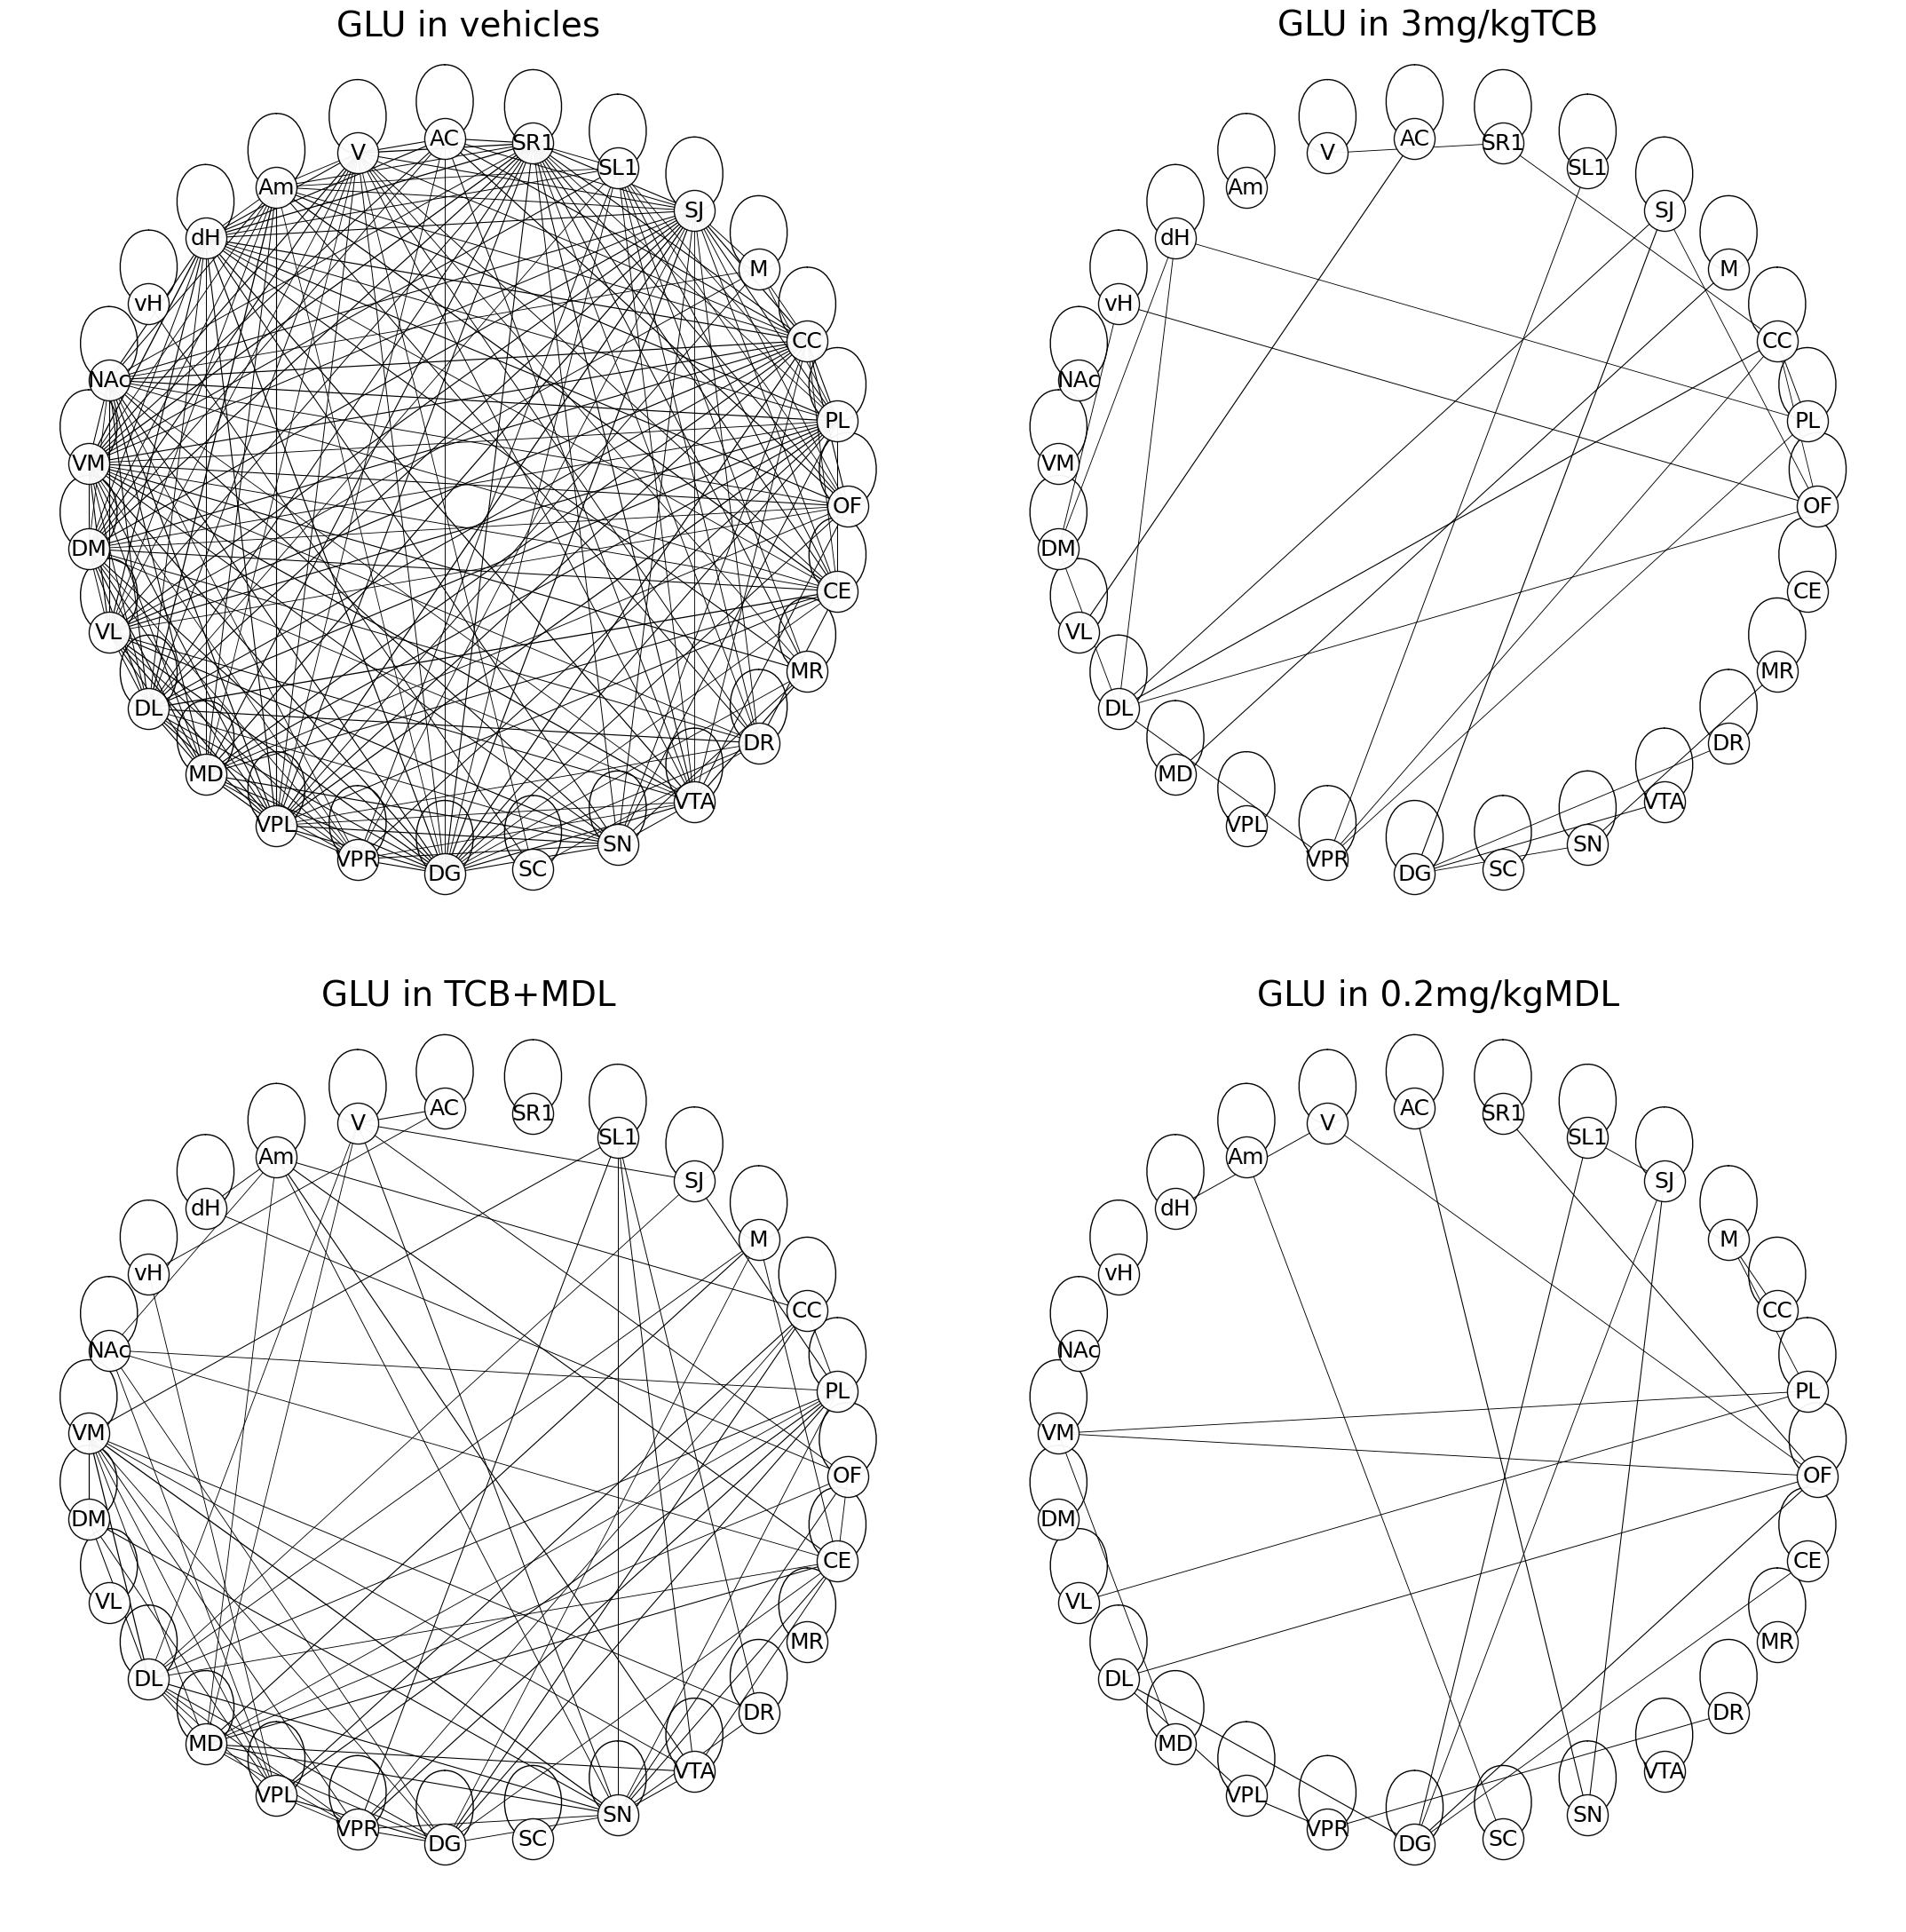

SAVED /Users/jasminebutler/Desktop/phd/output/agonist_antagonist_compound_GLU-DA_OF_PL_CC_M_SJ_SL1_SR1_AC_V_Am_dH_vH_NAc_VM_DM_VL_DL_MD_VPL_VPR_DG_Y_SC_SN_VTA_DR_MR_CE.svg
SAVED /Users/jasminebutler/Desktop/phd/output/agonist_antagonist_compound_GLU-DA_OF_PL_CC_M_SJ_SL1_SR1_AC_V_Am_dH_vH_NAc_VM_DM_VL_DL_MD_VPL_VPR_DG_Y_SC_SN_VTA_DR_MR_CE.png
SAVED /Users/jasminebutler/Desktop/phd/output/graph_agonist_antagonist_compound_GLU_OF_PL_CC_M_SJ_SL1_SR1_AC_V_Am_dH_vH_NAc_VM_DM_VL_DL_MD_VPL_VPR_DG_Y_SC_SN_VTA_DR_MR_CE.svg
SAVED /Users/jasminebutler/Desktop/phd/output/graph_agonist_antagonist_compound_GLU_OF_PL_CC_M_SJ_SL1_SR1_AC_V_Am_dH_vH_NAc_VM_DM_VL_DL_MD_VPL_VPR_DG_Y_SC_SN_VTA_DR_MR_CE.png


In [5]:
#CORRELOGRAMS

# correlogram(filename, p_value_threshold=0.05) #with all prompts

#copy bellow 
# OF,PL,CC,M,SJ,SL1,SR1,AC,V,Am,dH,vH,NAc,VM,DM,VL,DL,MD,VPL,VPR,DG,Y,SC,SN,VTA,DR,MR,CE




correlogram(filename, 
            experiment='agonist_antagonist', #  dose_response agonist_antagonist
            correlogram_type='compound',
            to_correlate='GLU-DA', 
            p_value_threshold=0.05, 
            n_minimum=5, 
            columns=["OF","PL","CC", "M", "SJ","SL1", "SR1", "AC", "V",  
                     "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", 
                     "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"],
            from_scratch=True,
            
            )




network(filename, 
            experiment='agonist_antagonist', #  dose_response agonist_antagonist
            correlogram_type='compound',
            to_correlate='GLU', 
            p_value_threshold=0.05, 
            n_minimum=5, 
            columns=["OF","PL","CC", "M", "SJ","SL1", "SR1", "AC", "V",  
                     "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", 
                     "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"],
            from_scratch=True,
            
            )


In [ ]:
#BEHQVIOR (HT / ES) #REMI need to intergrate stats logic, outliers, prompts and building multiple at once
headTwitchHistogram(
    HT_filename,
    experiment='dose_response',
    vairable='HT_20',
    outlier_test=None,
    p_value_threshold=0.05,
    from_scratch=True,
)

# subselectDf(getHeadTwitchDf(HT_filename), {"treatment": "0.2mg/kgMDL", "experiment": "agonist_antagonist"})


In [ ]:
#SUBSELECT RAW DATA

# subselectDf(getCompoundAndRatiosDf(filename), {"treatment": "3mg/kgTCB", "compound": "3MT", "region":["SJ", "dH"]})

subselectDf(getCompoundAndRatiosDf(filename), { "compound": "5HIAA/5HT", "region":["Y", "SC", "M", "MR"], 'experiment':'dose_response'})
#second pram is a dict of colname and subgroup to select


In [6]:
#GET AGGERGATED STATS DF
getQuantitativeStats(filename).index
#second pram is a dict of colname and subgroup to select


RETRIEVED "quantitative_stats" FROM "TCB2_data_HPLC" CACHE


Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       ...
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype='int64', length=187)

RETRIEVED "compound_and_ratios_df_aggregate_stats" FROM "TCB2_data_HPLC" CACHE


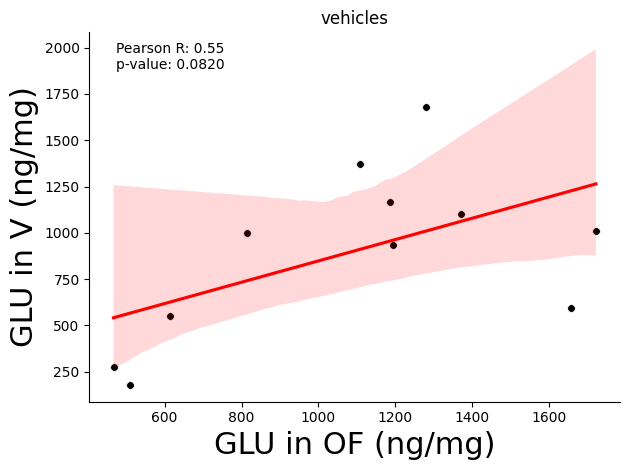

In [5]:
#show a single correlation #REMI/JJB make a funciton pls babe
#CONSTRUCTION
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#REMI / JAS w coffee this needs to be adjusted so its flexible between compounds between regions ect.... I was thinking a dict entry?
# line plot to show what a correlation is 
compound= 'GLU'
regions=['V', 'OF'] # y , x
treatment='vehicles'

df = subselectDf(getAggregateStatsDf(filename), {"treatment": treatment, "experiment": "dose_response", "region":regions, "compound":compound})

x_data = df[df['region'] == regions[1]]['values'].values[0]
y_data = df[df['region'] == regions[0]]['values'].values[0]

x_label=f"{compound} in {regions[1]} (ng/mg)"
y_label=f"{compound} in {regions[0]} (ng/mg)"

pearson_r, p_value = stats.pearsonr(x_data, y_data)
color = 'red' if pearson_r > 0 else 'blue'

fig, ax  = plt.subplots()
sns.scatterplot(x=x_data, y=y_data, ax=ax, marker='o',  s=30, color='black') #edgecolor='black', facecolor='salmon', linewidth=1.3,
sns.regplot(x=x_data, y=y_data, ci=95, ax=ax, scatter=False, line_kws={"color": color}) #scatter_kws={"color": "black"}

ax.set_xlabel(x_label, fontsize=22)
ax.set_ylabel(y_label, fontsize=22)
ax.spines[['right', 'top']].set_visible(False)
ax.set_title(treatment)
#add corr values
labels = f'Pearson R: {pearson_r:.2f}\np-value: {p_value:.4f}'
ax.text(0.05, 0.9, labels, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'))

plt.tight_layout()

Invalid characters in identifier, replacing with '_' 
Mouse id 16 has NaN values in columns: DOPAC_OF
... removed mouse 16
Mouse id 22 has NaN values in columns: DOPAC_OF
... removed mouse 22


/Users/jasminebutler/Desktop/phd/module/pca.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compound_region'] = df['compound'] + '_' + df['region']


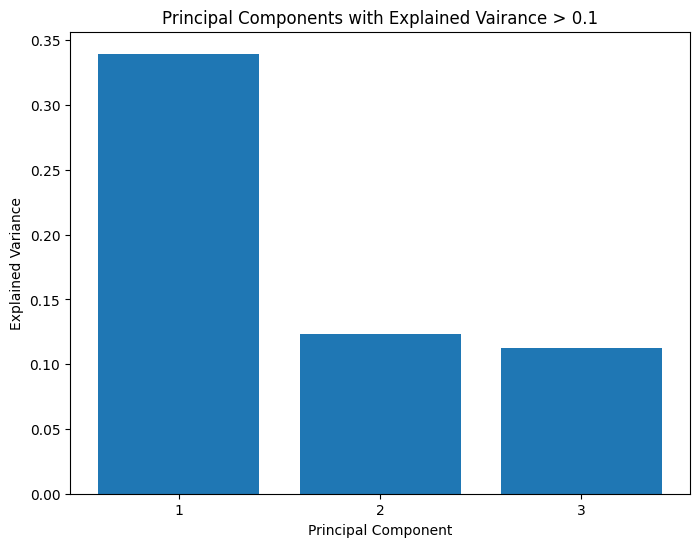

Loadings (Factors) for PC1 (Ordered by Absolute Magnitude):
       Factor   Loading
1    5HIAA_IC -0.376255
0    5HIAA_CC -0.331833
4    5HIAA_PL -0.328944
3    5HIAA_OF -0.302069
8    DOPAC_CC -0.283308
6   5HIAA_SL1 -0.273327
14  DOPAC_SL1 -0.270455
12   DOPAC_PL -0.269636
11   DOPAC_OF -0.218706
7   5HIAA_SR1 -0.211862
2     5HIAA_M -0.202669
9    DOPAC_IC -0.190601
10    DOPAC_M -0.189138
5    5HIAA_SJ -0.169417
13   DOPAC_SJ -0.112098
15  DOPAC_SR1 -0.029774
Loadings (Factors) for PC2 (Ordered by Absolute Magnitude):
       Factor   Loading
15  DOPAC_SR1  0.623031
14  DOPAC_SL1  0.390215
7   5HIAA_SR1  0.384103
5    5HIAA_SJ -0.359723
13   DOPAC_SJ -0.226003
3    5HIAA_OF -0.190989
0    5HIAA_CC -0.184708
10    DOPAC_M  0.163572
6   5HIAA_SL1  0.117981
4    5HIAA_PL -0.115413
11   DOPAC_OF -0.045023
12   DOPAC_PL -0.039816
1    5HIAA_IC -0.031968
9    DOPAC_IC  0.030295
2     5HIAA_M -0.027989
8    DOPAC_CC  0.025018
Loadings (Factors) for PC3 (Ordered by Absolute Magnitude):
    

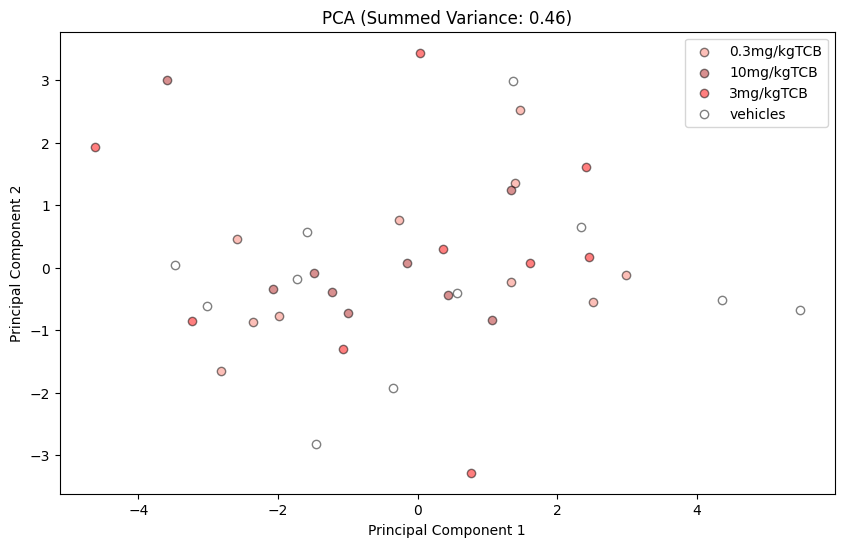

In [3]:
#PCA

# pca(filename)

pca(filename, 
    experiment='dose_response',
    compounds=['DOPAC','5HIAA'], 
    regions=["OF","PL","CC","IC","M", "SJ","SL1","SR1"], 
    from_scratch=True,
    threshold_vairance = 0.1)


In [ ]:

##### MAKE DOCS LAZY GIRL #####

# outlier tests  = ['grubbs', 'ROUT']  #todo add code for ROUT
# post hoc tests = [ 'pLSD' , 'tukey' ] #todo add code for
# quantitative stats = ['two_way_anova', 'one_way_anova', 'tukey'] #TODO this should not be here but with post hoc not written yet
# correlative stats = ['pearson', 'spearmam', 'kendall']

#DFs floating around
# aggergate_stats, quantative_stats, compound_and_ratio_df ++graph_stats


Invalid characters in identifier, replacing with '_' 
correlating using pearson
correlating using pearson
correlating using pearson
correlating using pearson
 treatment vehicles correlating ['5HT', 'DA'] 
 treatment 3mg/kgTCB correlating ['5HT', 'DA'] 
 treatment 0.2mg/kgMDL correlating ['5HT', 'DA'] 
 treatment TCB+MDL correlating ['5HT', 'DA'] 
CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/graph_agonist_antagonist_compound_5HT-DA_OF_PL_CC_M_SJ_SL1_SR1_AC_V_Am_dH_vH_NAc_VM_DM_VL_DL_MD_VPL_VPR_DG_Y_SC_SN_VTA_DR_MR_CE.pkl
SAVED /Users/jasminebutler/Desktop/phd/output/graph/graph_agonist_antagonist_compound_5HT-DA_OF_PL_CC_M_SJ_SL1_SR1_AC_V_Am_dH_vH_NAc_VM_DM_VL_DL_MD_VPL_VPR_DG_Y_SC_SN_VTA_DR_MR_CE.svg
SAVED /Users/jasminebutler/Desktop/phd/output/graph/graph_agonist_antagonist_compound_5HT-DA_OF_PL_CC_M_SJ_SL1_SR1_AC_V_Am_dH_vH_NAc_VM_DM_VL_DL_MD_VPL_VPR_DG_Y_SC_SN_VTA_DR_MR_CE.png


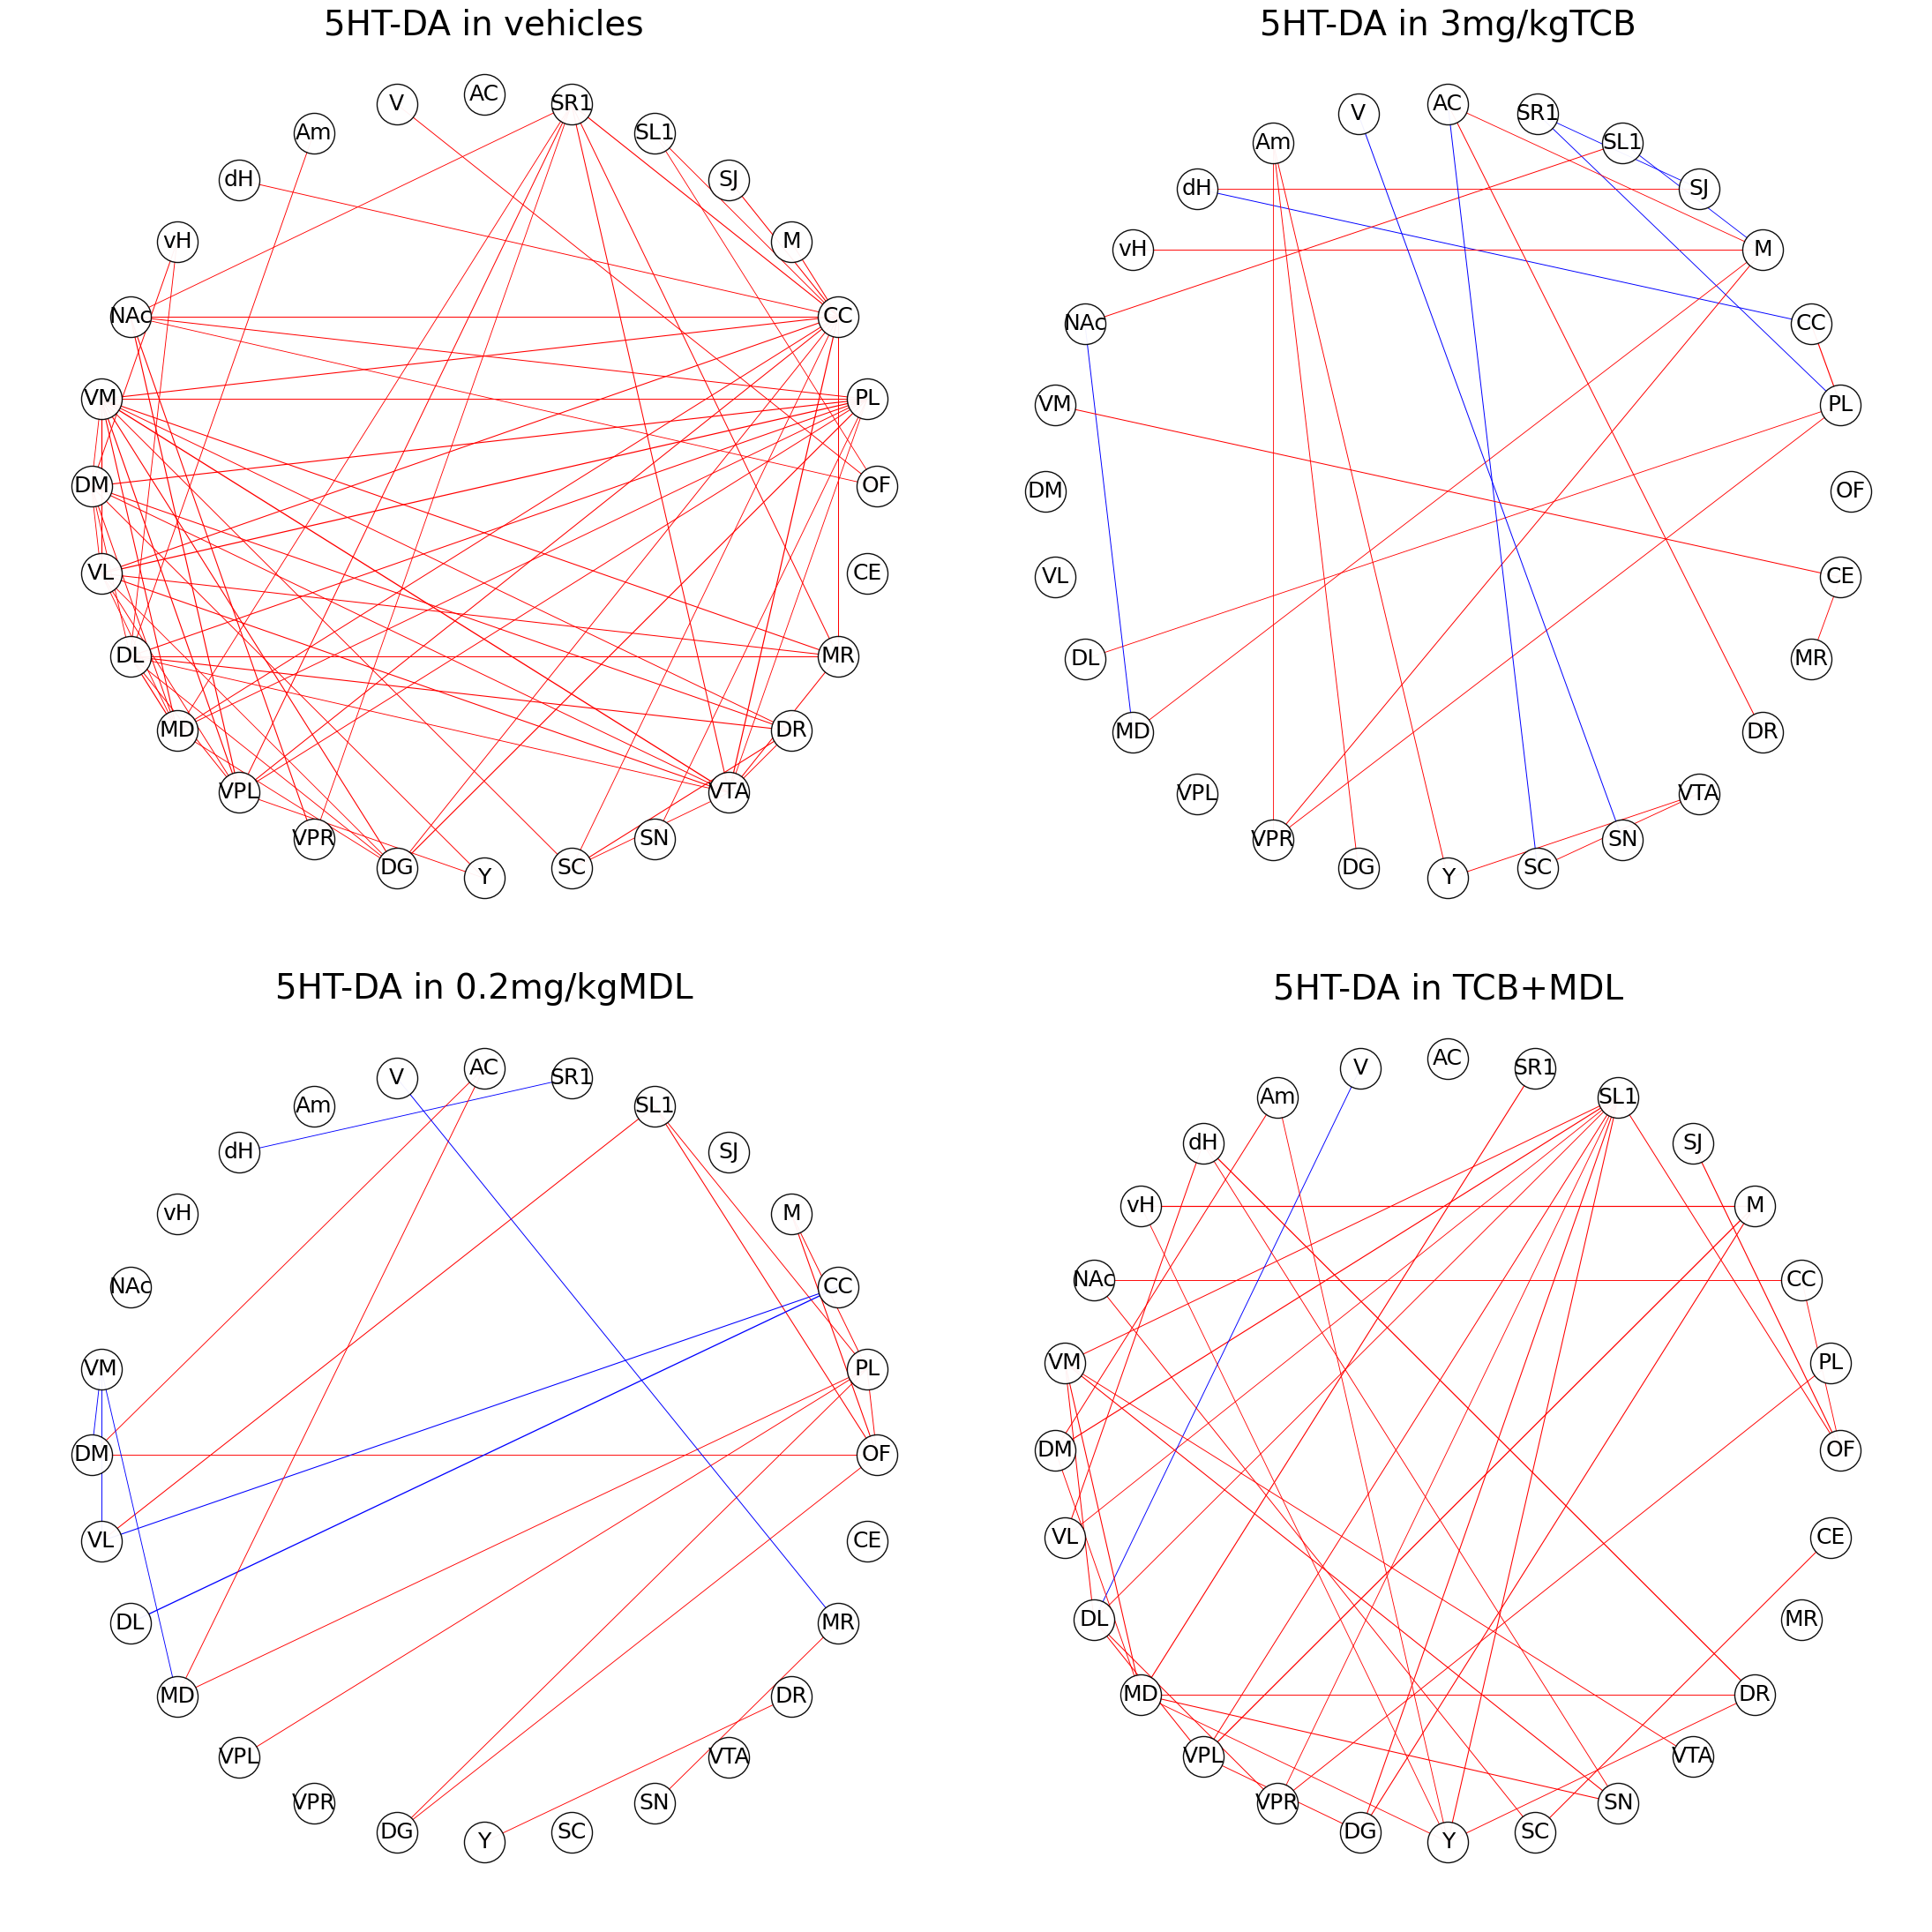

In [10]:
#GRAPH THEORY 

correlogram(filename, 
            experiment='agonist_antagonist', #  dose_response agonist_antagonist
            correlogram_type='compound',
            to_correlate='5HT-DA', 
            p_value_threshold=0.05, 
            n_minimum=5, 
            columns=["OF","PL","CC", "M", "SJ","SL1", "SR1", "AC", "V",  
                     "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", 
                     "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"],
            from_scratch=True,
            
            )


network(filename, 
            experiment='agonist_antagonist', #  dose_response agonist_antagonist
            correlogram_type='region',
            to_correlate='PL-CC', 
            p_value_threshold=0.05, 
            n_minimum=5, 
            columns=['DA','NA','5HT','GLU','GABA','ASP','GLY'],
            from_scratch=True,
            
            )
